#### Wiktor Głazek ####
# Rain in Australia #
## Klasyfikacja numeryczno-kategorycznej bazy danych parametrów pogodowych ##

## Wstęp ##

Celem poniższej pracy była klasyfikacja bazy danych parametrów pogodowych dla Australii w latach 2008 - 2017 w celu predykcji wystąpienia
opadów atmosferycznych w dniu następnym względem daty odczytów. Każdy rekord w bazie danych to podsumowanie całodobowych pomiarów
parametrów pogodowych dla odpowiadającej im daty i lokalizacji. Pomiary odbywały się w kilkudziesięciu stacjach meteorologicznych,
położonych w sposób nieregularny na obszarze całej Australii.

Badane paramtery obejmowały:
- MinTemp
- MaxTemp
- Rainfall
- WindGustDir 
- WindGustSpeed
- WindDir9am
- WindDir3pm
- WindSpeed9am 
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Temp9am
- Temp3pm

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("weatherAUS.csv")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Preprocessing danych ###
Przed dalszą analizą bazę danych wstępnie przygotowano. Usunięto wszystkie rekordy z niezdefiniowaną zmienną docelową ze względu na ich nieprzydatność
w procesie testowania klasyfikatorów. Następnie usunięto nieistotną dla założonego modelu kolumnę z datą pomiarów. Sprawdzono również występowanie błędów w danych.
W kolumnie ze zmienną docelową zamieniono dane kategoryczne na wartości liczbowe.

 - Usunięcie rekordów z niezdefiniowaną zmienną docelową ("RainTomorrow")

In [90]:
df.dropna(subset=['RainTomorrow'], inplace=True)

 - Usunięcie nieistotnej dla modelu kolumny z datą

In [91]:
df.drop(columns=["Date"], inplace=True)

 - Testy występowania błędnych danych numerycznych. Nie stwierdzono występowania błędnych wartości.

In [92]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


 - Testy występowania błędnych danych opisowych. Nie stwierdzono występowania błędnych wartości.

In [93]:
print(df["Location"].unique())
print(df["WindGustDir"].unique())
print(df["WindDir9am"].unique())
print(df["WindDir3pm"].unique())
print(df["RainToday"].unique())
print(df["RainTomorrow"].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['No' 'Yes' nan]
['No' 'Yes']


 - Zamiana danych kategorycznych na wartości liczbowe dla kolumny ze zmienną docelową ("RainTomorrow")

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"])

#### Dalsza obróbka i analiza danych ####
W wyniku powyższych operacji otrzymano częściowo przetoworzoną bazę danych, która stanowi podstawę do dalszej obróbki.
Poniżej zaproponowana dwa warianty podejścia do dalszego przetwarzania tej bazy, różniące się zastosowanymi technikami
obróbki i podejściem do usuwania brakujących danych.

## Wariant 1 - Model predykcji opadów dla strefy umiarkowanej ##

![Alt text](aus_map.jpg)

W tym wariancie baza danych została zredukowana do odczytów z lokalizacji położonych w obrębie jednej strefy klimatycznej
(umiarkowanej), według klasyfikacji Köppena–Geigera. Zawiera ona zdecydowaną większość lokalizacji pomiarowych. Wykluczono także
lokalizacje "ekstremalne" (np. wysokie górskie szczyty). Założono, że w obrębie jednej strefy klimatycznej wpływ poszególnych
parametrów na zmienną docelową jest stały, bez względu na konkretną lokalizację stacji pomiarowej. W oparciu o takie
założenia, kolumna "Location" została usunięta.

Dodatkowe założenia wariantu:
 - Usunięcie wszystkich rekordów z przynajmniej jedną wartością NA
 - Usunięcie kolumn z danymi kategorycznymi nominalnymi ("WindGustDir", "WindDir9am", "WindDir3pm")
 - Całkowicie wyrównano dysproporcję pomiędzy wartościami klas metodą under-sampling
 - Dane zostały znormalizowane metodą min-max

W ogólności, wariant ten miał na celu zbadanie skuteczności klasyfikatorów na danych wyłącznie oryginalnych, zbalansowanych
i przetworzonych w niewielkim stopniu, chociaż kosztem znaczącego zmniejszenia ich ilości.

#### Dalszy preprocessing danych dla Wariantu 1 ####

- Redukcja bazy danych do rekordów pochodzących z badanego obszaru

In [95]:
df1 = df.copy()

temperate_zone_locations = np.array(['Albury', 'BadgerysCreek', 'CoffsHarbour', 'Moree', 'Newcastle',
                                    'NorahHead', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
                                    'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong',
                                    'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
                                    'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Adelaide', 'MountGambier',
                                    'Nuriootpa', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
                                    'Perth', 'Walpole', 'Hobart', 'Launceston'])

df1 = df1[df1['Location'].isin(temperate_zone_locations)]

 - Usunięcie kolumn "Location", "WindGustDir", "WindDir9am", "WindDir3pm"

In [96]:
df1.drop(columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"], inplace=True)


- Usunięcie rekordów z wystąpieniem niezdefiniowanej wartości w dowolnej z kolumn

In [97]:
df1.dropna(inplace=True)

 - Zamiana danych kategorycznych na wartości liczbowe w kolumnie "RainToday"

In [98]:
df1["RainToday"] = le.fit_transform(df1["RainToday"])

- Badanie poziomu niezrównoważenia danych, optymalizacja struktury bazy danych

In [99]:
print(df1["RainTomorrow"].value_counts())

def drop_nrows(df, number):
    idx_to_drop = []
    for idx, row in df.iterrows():
        if row["RainTomorrow"] == 0:
            idx_to_drop.append(idx)
            if len(idx_to_drop) == number:
                break
    df.drop(idx_to_drop, inplace=True)

drop_nrows(df1, df1["RainTomorrow"].value_counts()[0] - df1["RainTomorrow"].value_counts()[1])

print(df1["RainTomorrow"].value_counts())

0    28484
1     8636
Name: RainTomorrow, dtype: int64
1    8636
0    8636
Name: RainTomorrow, dtype: int64


- Normalizacja danych metodą min-max

In [100]:
df1 = (df1-df1.min())/(df1.max()-df1.min())
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000,17272.000000
mean,0.471229,0.371262,0.021546,0.110264,0.458962,0.291409,0.244144,0.304946,0.674808,0.534018,0.589788,0.604816,0.599938,0.622612,0.410073,0.379563,0.297244,0.500000
std,0.152339,0.172940,0.054960,0.079033,0.281941,0.131664,0.135479,0.134795,0.193964,0.216068,0.132546,0.121390,0.345949,0.326602,0.145539,0.160993,0.457058,0.500014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360465,0.239295,0.000000,0.051163,0.223776,0.194690,0.138462,0.200000,0.536082,0.377551,0.505155,0.527508,0.250000,0.375000,0.298734,0.255981,0.000000,0.000000
50%,0.459302,0.347607,0.000000,0.093023,0.475524,0.265487,0.230769,0.292308,0.680412,0.520408,0.591065,0.605178,0.750000,0.750000,0.392405,0.358852,0.000000,0.500000
75%,0.581395,0.481108,0.015625,0.158140,0.687063,0.362832,0.307692,0.400000,0.835052,0.683673,0.680412,0.686084,0.875000,0.875000,0.511392,0.480861,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17272 entries, 9059 to 133029
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        17272 non-null  float64
 1   MaxTemp        17272 non-null  float64
 2   Rainfall       17272 non-null  float64
 3   Evaporation    17272 non-null  float64
 4   Sunshine       17272 non-null  float64
 5   WindGustSpeed  17272 non-null  float64
 6   WindSpeed9am   17272 non-null  float64
 7   WindSpeed3pm   17272 non-null  float64
 8   Humidity9am    17272 non-null  float64
 9   Humidity3pm    17272 non-null  float64
 10  Pressure9am    17272 non-null  float64
 11  Pressure3pm    17272 non-null  float64
 12  Cloud9am       17272 non-null  float64
 13  Cloud3pm       17272 non-null  float64
 14  Temp9am        17272 non-null  float64
 15  Temp3pm        17272 non-null  float64
 16  RainToday      17272 non-null  float64
 17  RainTomorrow   17272 non-null  float64
dtypes:

### Podział datasetu wariantu 1 ###

In [102]:
from sklearn.model_selection import train_test_split

y1 = df1["RainTomorrow"]
X1 = df1[df1.columns.drop("RainTomorrow")]

df1_train_X, df1_test_X, df1_train_y, df1_test_y = train_test_split(X1, y1, train_size=0.70, random_state=278860)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)
    
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)


### Konstrukcja klasyfikatorów dla wariantu 1 ###

#### Funkcja rysująca macierz błędów ####

In [103]:
from sklearn import metrics

def draw_cf_matrix(df_test_y, y_pred, title):
    confusion_matrix = metrics.confusion_matrix(df_test_y, y_pred)
    cf_df = pd.DataFrame(confusion_matrix, index=[
                         'No', 'Yes'], columns=['No', 'Yes'])
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value)
                    for value in confusion_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(
        value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(
        group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5.5, 4))
    sns.heatmap(cf_df/np.sum(cf_df), annot=labels, fmt="", cmap='Blues')
    plt.title(f"{title}" + "\nAccuracy: {:.2f}%".format(
        metrics.accuracy_score(df_test_y, y_pred)*100))
    plt.show()

#### Drzewo decyzyjne ####

##### głębokość = 8 (najlepsza znaleziona wartość) #####

In [104]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(df1_train_X, df1_train_y)
evaluation = dtc.score(df1_test_X, df1_test_y)
y_pred = dtc.predict(df1_test_X)
print("Drzewo decyzyjne, 8 poziomów - skuteczność:", round(evaluation*100, 2), "%")

Drzewo decyzyjne, 8 poziomów - skuteczność: 81.11 %


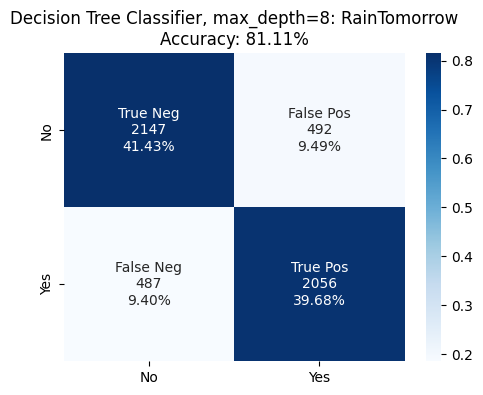

In [105]:
draw_cf_matrix(df1_test_y, y_pred, "Decision Tree Classifier, max_depth=8: RainTomorrow")

##### głębokość = 1 (która zmienna może być najistotniejsza?) #####

In [106]:
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(df1_train_X, df1_train_y)
evaluation = dtc.score(df1_test_X, df1_test_y)
y_pred = dtc.predict(df1_test_X)
print("Drzewo decyzyjne, 1 poziom - skuteczność:", round(evaluation*100, 2), "%")

Drzewo decyzyjne, 1 poziom - skuteczność: 75.88 %


[Text(0.5, 0.75, 'Humidity3pm <= 0.566\ngini = 0.5\nsamples = 12090\nvalue = [5997, 6093]'),
 Text(0.25, 0.25, 'gini = 0.4\nsamples = 6922\nvalue = [5005, 1917]'),
 Text(0.75, 0.25, 'gini = 0.31\nsamples = 5168\nvalue = [992, 4176]')]

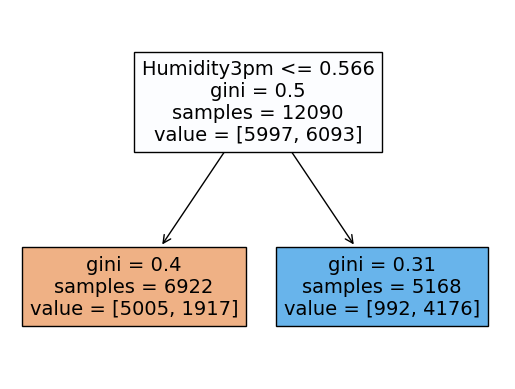

In [107]:
from sklearn import tree
tree.plot_tree(dtc, feature_names=list(df1_test_X.keys()), filled=True)

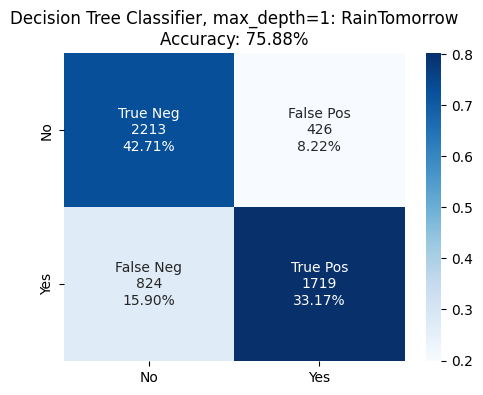

In [108]:
draw_cf_matrix(df1_test_y, y_pred, "Decision Tree Classifier, max_depth=1: RainTomorrow")

##### max_leaf_nodes=100 #####

In [109]:
dtc = DecisionTreeClassifier(max_leaf_nodes=100)
dtc.fit(df1_train_X, df1_train_y)
evaluation = dtc.score(df1_test_X, df1_test_y)
y_pred = dtc.predict(df1_test_X)
print("Drzewo decyzyjne, 100 węzłów - skuteczność:", round(evaluation*100, 2), "%")

Drzewo decyzyjne, 100 węzłów - skuteczność: 81.05 %


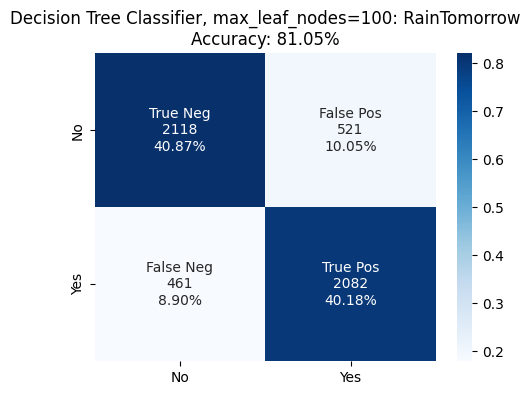

In [110]:
draw_cf_matrix(df1_test_y, y_pred, "Decision Tree Classifier, max_leaf_nodes=100: RainTomorrow")

#### Naiwny Bayes ####

In [111]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(df1_train_X, df1_train_y)
evaluation = gnb.score(df1_test_X, df1_test_y)
y_pred = gnb.predict(df1_test_X)
print("Naiwny Bayes - skuteczność:", round(evaluation*100, 2), "%")

Naiwny Bayes - skuteczność: 78.27 %


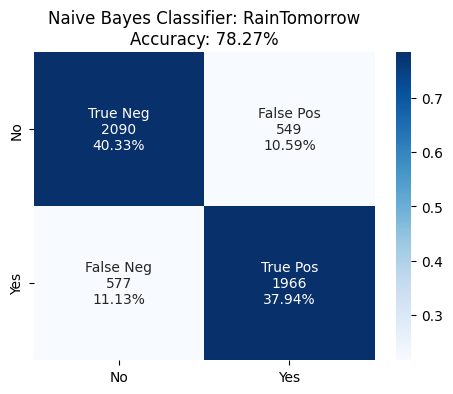

In [112]:
draw_cf_matrix(df1_test_y, y_pred, "Naive Bayes Classifier: RainTomorrow")

#### K-Najbliższych Sąsiadów ####

##### dla k = 3 #####

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df1_train_X, df1_train_y)
evaluation = knn.score(df1_test_X, df1_test_y)
y_pred = knn.predict(df1_test_X)
print("K-Neighbors, k=3 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=3 - skuteczność: 81.92 %


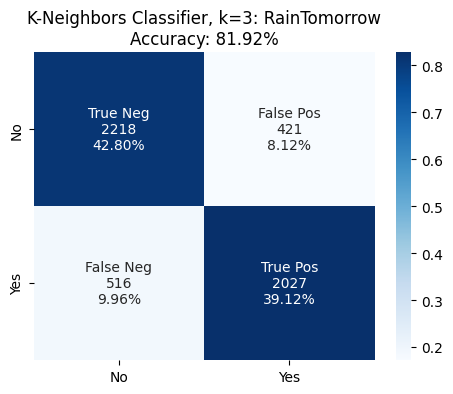

In [114]:
draw_cf_matrix(df1_test_y, y_pred, "K-Neighbors Classifier, k=3: RainTomorrow")

##### dla k = 5 #####

In [115]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df1_train_X, df1_train_y)
evaluation = knn.score(df1_test_X, df1_test_y)
y_pred = knn.predict(df1_test_X)
print("K-Neighbors, k=5 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=5 - skuteczność: 82.69 %


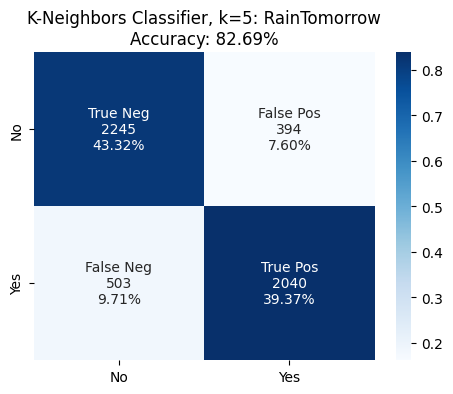

In [116]:
draw_cf_matrix(df1_test_y, y_pred, "K-Neighbors Classifier, k=5: RainTomorrow")

##### dla k = 10 (najlepsza znaleziona wartość) #####

In [117]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(df1_train_X, df1_train_y)
evaluation = knn.score(df1_test_X, df1_test_y)
y_pred = knn.predict(df1_test_X)
print("K-Neighbors, k=10 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=10 - skuteczność: 82.28 %


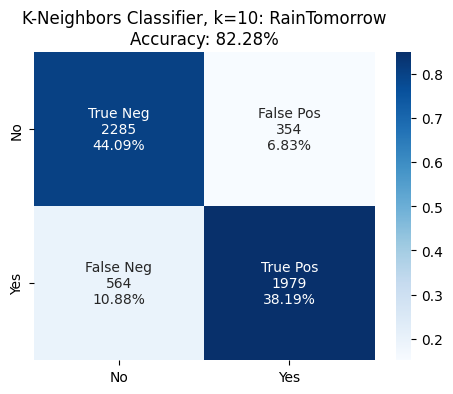

In [118]:
draw_cf_matrix(df1_test_y, y_pred, "K-Neighbors Classifier, k=10: RainTomorrow")

##### dla k = 11 #####

In [119]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(df1_train_X, df1_train_y)
evaluation = knn.score(df1_test_X, df1_test_y)
y_pred = knn.predict(df1_test_X)
print("K-Neighbors, k=11 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=11 - skuteczność: 82.54 %


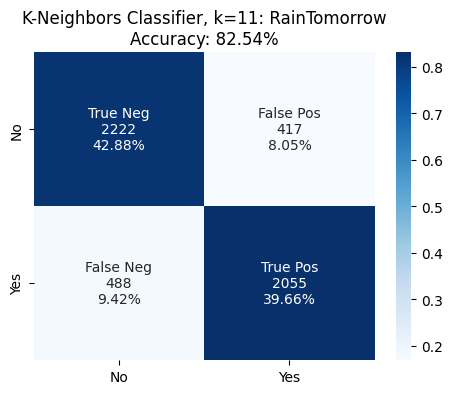

In [120]:
draw_cf_matrix(df1_test_y, y_pred, "K-Neighbors Classifier, k=11: RainTomorrow")

#### Sieć Multi-layer Perceptron ####

##### Wersja 1 - jedna warstwa hidden o rozmiarze równym inputowi #####

In [121]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', hidden_layer_sizes=(18,))
clf.fit(df1_train_X, df1_train_y)
y_pred = clf.predict(df1_test_X)
evaluation = clf.score(df1_test_X, df1_test_y)

print("MLPC 1 - skuteczność:", round(evaluation*100, 2), "%")

MLPC 1 - skuteczność: 83.52 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


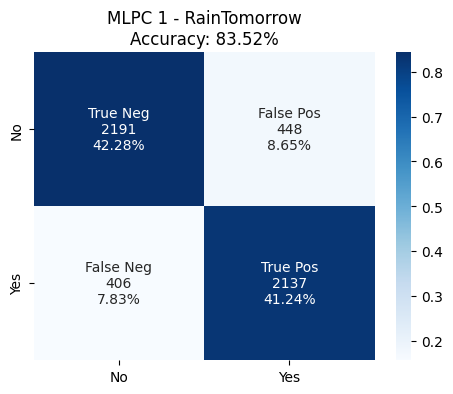

In [122]:
draw_cf_matrix(df1_test_y, y_pred, "MLPC 1 - RainTomorrow")

Text(0.5, 1.0, 'Loss curve')

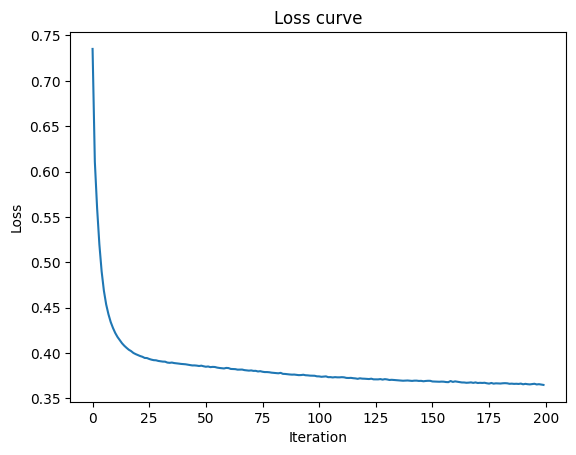

In [123]:
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")

##### Wersja 2 - dwie warstwy hidden o rozmiarach równych inputowi #####

In [124]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(18, 18))
clf.fit(df1_train_X, df1_train_y)
y_pred = clf.predict(df1_test_X)
evaluation = clf.score(df1_test_X, df1_test_y)

print("MLPC 2 - skuteczność:", round(evaluation*100, 2), "%")

MLPC 2 - skuteczność: 84.14 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


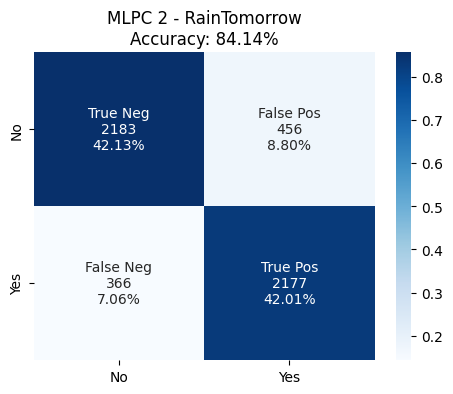

In [125]:
draw_cf_matrix(df1_test_y, y_pred, "MLPC 2 - RainTomorrow")

Text(0.5, 1.0, 'Loss curve')

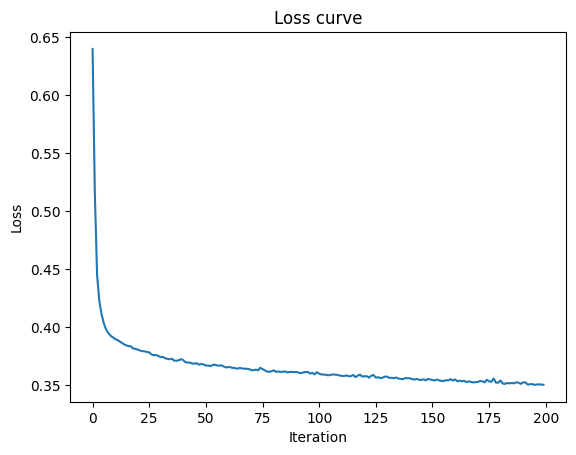

In [126]:
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")

##### Wersja 3 - dwie warstwy hidden o rozmiarach 2/3 inputu + output #####

In [127]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(13, 13))
clf.fit(df1_train_X, df1_train_y)
y_pred = clf.predict(df1_test_X)
evaluation = clf.score(df1_test_X, df1_test_y)

print("MLPC 3 - skuteczność:", round(evaluation*100, 2), "%")

MLPC 3 - skuteczność: 83.89 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


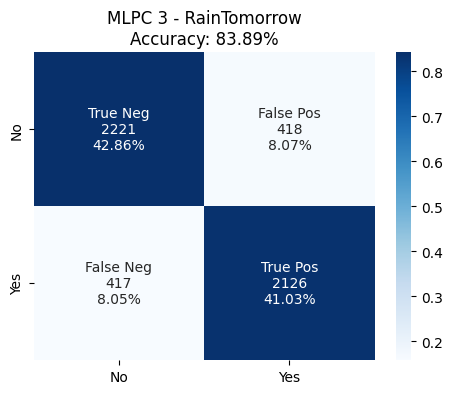

In [128]:
draw_cf_matrix(df1_test_y, y_pred, "MLPC 3 - RainTomorrow")

Text(0.5, 1.0, 'Loss curve')

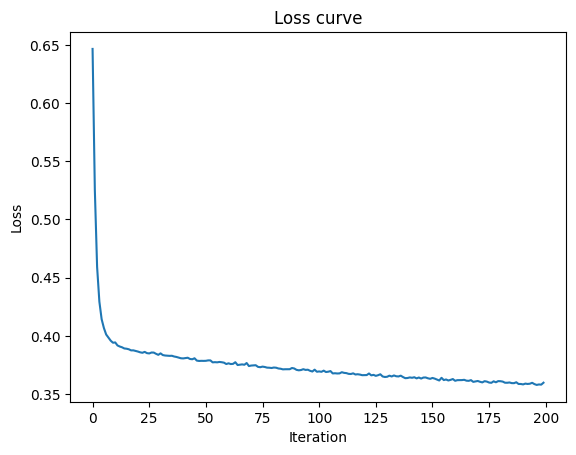

In [129]:
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")

## Wariant 2 - Model predykcji opadów dla całego obszaru  ##

![Alt text](aus_map_2.jpg)

W tym wariancie wcześniej przygotowana baza danych nie jest dzielona ze względu na obszar.
Założono, że przy odpowiednio dużej ilości danych cechy klimatyczne danej lokalizacji są już zawarte w badanych parametrach pogodowych.
W oparciu o takie założenia, kolumna "Location" została usunięta.

Dodatkowe założenia wariantu:
 - Usunięto kolumny, których udział wartości niezdefiniowanych przekroczył 40%: "Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"
 - Usunięto rekordy z udziałem przynjamniej 9 wartości NA (odpowiada to połowie zmiennych w nowej bazie)
 lub z wartością NA w kolumnie "RainToday" (w której prosta imputacja mogłaby zafałszować dane)
 - Brakujące wartości danych numerycznych wypełniono średnią kolumny
 - Brakujące wartości danych kategorycznych wypełniono dominantą kolumny
 - Dla kolumn z danymi kategorycznymi nominalnymi ("WindGustDir", "WindDir9am", "WindDir3pm") zastosowano one-hot enconding
 - Dane zostały znormalizowane metodą min-max

W ogólności, wariant ten miał na celu zbadanie skuteczności klasyfikatorów na danych silnie przetworzonych.
Kosztem zmiejszenia udziału danych wyłącznie oryginalnych (spowodowanym imputacją) wykorzystano zdecydowaną więkoszosć przygotowanej bazy danych.

#### Dalszy preprocessing danych dla Wariantu 2 ####

- Usunięcie wybrakowanych kolumn "Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"

In [130]:
df2 = df.copy()

df2.drop(columns=["Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"], inplace=True)

 - Usunięcie kolumny "Location"

In [131]:
df2.drop(columns=["Location"], inplace=True)

- Usunięcie rekordów z udziałem przynajmniej 9 wartości niezdefiniowanych

In [132]:
df2.dropna(axis=0, thresh=9, inplace=True)

 - Usunięcie rekordów z niezdefiniowaną zmienną "RainToday"

In [133]:
df2.dropna(subset=['RainToday'], inplace=True)

- Imputacja dla danych numerycznych

In [134]:
df2["MinTemp"].fillna(df2["MinTemp"].mean(), inplace=True)
df2["MaxTemp"].fillna(df2["MaxTemp"].mean(), inplace=True)
df2["WindGustSpeed"].fillna(df2["WindGustSpeed"].mean(), inplace=True)
df2["WindSpeed9am"].fillna(df2["WindSpeed9am"].mean(), inplace=True)
df2["WindSpeed3pm"].fillna(df2["WindSpeed3pm"].mean(), inplace=True)
df2["Humidity9am"].fillna(df2["Humidity9am"].mean(), inplace=True)
df2["Humidity3pm"].fillna(df2["Humidity3pm"].mean(), inplace=True)
df2["Pressure9am"].fillna(df2["Pressure9am"].mean(), inplace=True)
df2["Pressure3pm"].fillna(df2["Pressure3pm"].mean(), inplace=True)
df2["Temp9am"].fillna(df2["Temp9am"].mean(), inplace=True)
df2["Temp3pm"].fillna(df2["Temp3pm"].mean(), inplace=True)
df2["Pressure3pm"].fillna(df2["Pressure3pm"].mean(), inplace=True)

- Usunięcie danych odstających

In [135]:
def remove_outliers(df, columns, n_std):
    for col in columns:
        if col not in ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow"]:
            mean = df[col].mean()
            sd = df[col].std()
            df = df[(df[col] <= mean+(n_std*sd))]
    return df

df2 = remove_outliers(df2, df2.columns, 3)

- Imputacja dla danych kategorycznych w kolumnach "WindGustDir", "WindDir9am", "WindDir3pm"

In [136]:
df2["WindGustDir"].fillna(df2["WindGustDir"].mode()[0], inplace=True)
df2["WindDir9am"].fillna(df2["WindDir9am"].mode()[0], inplace=True)
df2["WindDir3pm"].fillna(df2["WindDir3pm"].mode()[0], inplace=True)

 - Zamiana danych kategorycznych na wartości liczbowe w kolumnie "RainToday"

In [137]:
df2["RainToday"] = le.fit_transform(df2["RainToday"])

 - Zamiana danych kategorycznych na wartości liczbowe w kolumnach "WindGustDir", "WindDir9am", "WindDir3pm"

In [138]:
wind_gust_dummies = pd.get_dummies(df2["WindGustDir"], prefix="gust")
wind_dir9am_dummies = pd.get_dummies(df2["WindDir9am"], prefix="9am")
wind_dir3pm_dummies = pd.get_dummies(df2["WindDir3pm"], prefix="3pm")
df2_columns = df.columns
df2 = pd.concat([wind_gust_dummies, wind_dir9am_dummies, wind_dir3pm_dummies, df2], axis=1)
df2.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm"], inplace=True)

- Normalizacja danych metodą min-max

In [139]:
df2 = (df2-df2.min())/(df2.max()-df2.min())
df2.describe()

,gust_E,gust_ENE,gust_ESE,gust_N,gust_NE,gust_NNE,gust_NNW,gust_NW,gust_S,gust_SE,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,...,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000,134331.000000
mean,0.065175,0.057678,0.052445,0.062294,0.050845,0.046155,0.046661,0.055654,0.062346,0.066113,...,0.347211,0.422625,0.686659,0.510510,0.642886,0.655804,0.553654,0.569932,0.207138,0.208507
std,0.246835,0.233135,0.222924,0.241689,0.219681,0.209821,0.210912,0.229252,0.241784,0.248480,...,0.209768,0.188906,0.188360,0.203265,0.118256,0.114791,0.148467,0.143632,0.405257,0.406243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.179487,0.302326,0.570000,0.370000,0.569369,0.582746,0.444954,0.464286,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.395349,0.690000,0.514489,0.638814,0.652423,0.548165,0.560924,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.487179,0.558140,0.820000,0.650000,0.717117,0.728873,0.658257,0.668067,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134331 entries, 0 to 145458
Data columns (total 62 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gust_E         134331 non-null  float64
 1   gust_ENE       134331 non-null  float64
 2   gust_ESE       134331 non-null  float64
 3   gust_N         134331 non-null  float64
 4   gust_NE        134331 non-null  float64
 5   gust_NNE       134331 non-null  float64
 6   gust_NNW       134331 non-null  float64
 7   gust_NW        134331 non-null  float64
 8   gust_S         134331 non-null  float64
 9   gust_SE        134331 non-null  float64
 10  gust_SSE       134331 non-null  float64
 11  gust_SSW       134331 non-null  float64
 12  gust_SW        134331 non-null  float64
 13  gust_W         134331 non-null  float64
 14  gust_WNW       134331 non-null  float64
 15  gust_WSW       134331 non-null  float64
 16  9am_E          134331 non-null  float64
 17  9am_ENE        134331 non-nul

### Podział datasetu wariantu 2 ###

In [141]:
y2 = df2["RainTomorrow"]
X2 = df2[df2.columns.drop("RainTomorrow")]

df2_train_X, df2_test_X, df2_train_y, df2_test_y = train_test_split(X2, y2, train_size=0.70, random_state=278860)

### Konstrukcja klasyfikatorów dla wariantu 2 ###

#### Drzewo decyzyjne ####

##### głębokość = 7 (najlepsza znaleziona wartość) #####

In [142]:
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(df2_train_X, df2_train_y)
evaluation = dtc.score(df2_test_X, df2_test_y)
y_pred = dtc.predict(df2_test_X)
print("Drzewo decyzyjne, 8 poziomów - skuteczność:", round(evaluation*100, 2), "%")

Drzewo decyzyjne, 8 poziomów - skuteczność: 84.93 %


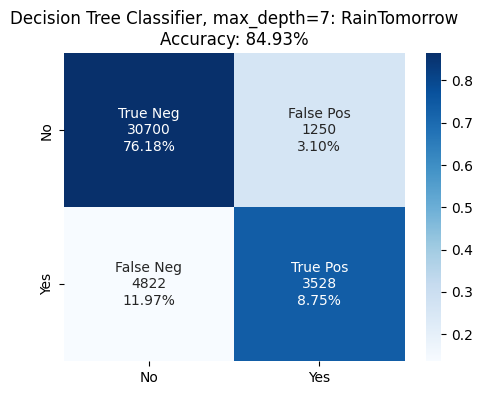

In [143]:
draw_cf_matrix(df2_test_y, y_pred, "Decision Tree Classifier, max_depth=7: RainTomorrow")

##### głębokość = 1 (która zmienna może być najistotniejsza?) #####

In [144]:
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(df2_train_X, df2_train_y)
evaluation = dtc.score(df2_test_X, df2_test_y)
y_pred = dtc.predict(df2_test_X)
print("Drzewo decyzyjne, 1 poziom - skuteczność:", round(evaluation*100, 2), "%")

Drzewo decyzyjne, 1 poziom - skuteczność: 82.48 %


[Text(0.5, 0.75, 'Humidity3pm <= 0.715\ngini = 0.331\nsamples = 94031\nvalue = [74372, 19659]'),
 Text(0.25, 0.25, 'gini = 0.237\nsamples = 79281\nvalue = [68390, 10891]'),
 Text(0.75, 0.25, 'gini = 0.482\nsamples = 14750\nvalue = [5982, 8768]')]

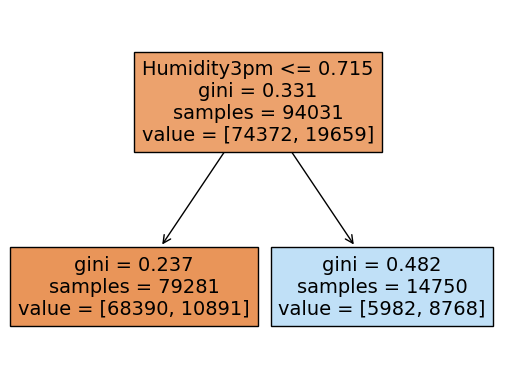

In [145]:
tree.plot_tree(dtc, feature_names=list(df2_test_X.keys()), filled=True)

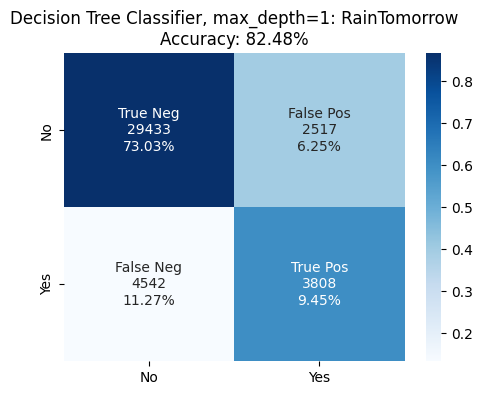

In [146]:
draw_cf_matrix(df2_test_y, y_pred, "Decision Tree Classifier, max_depth=1: RainTomorrow")

##### max_leaf_nodes=100 #####

In [147]:
dtc = DecisionTreeClassifier(max_leaf_nodes=100)
dtc.fit(df2_train_X, df2_train_y)
evaluation = dtc.score(df2_test_X, df2_test_y)
y_pred = dtc.predict(df2_test_X)
print("Drzewo decyzyjne, 100 węzłów - skuteczność:", round(evaluation*100, 2), "%")

Drzewo decyzyjne, 100 węzłów - skuteczność: 84.88 %


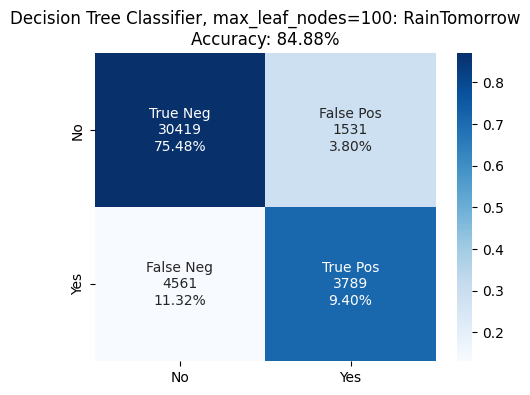

In [148]:
draw_cf_matrix(df2_test_y, y_pred, "Decision Tree Classifier, max_leaf_nodes=100: RainTomorrow")

#### Naiwny Bayes ####

In [149]:
gnb = GaussianNB()
gnb.fit(df2_train_X, df2_train_y)
evaluation = gnb.score(df2_test_X, df2_test_y)
y_pred = gnb.predict(df2_test_X)
print("Naiwny Bayes - skuteczność:", round(evaluation*100, 2), "%")

Naiwny Bayes - skuteczność: 70.57 %


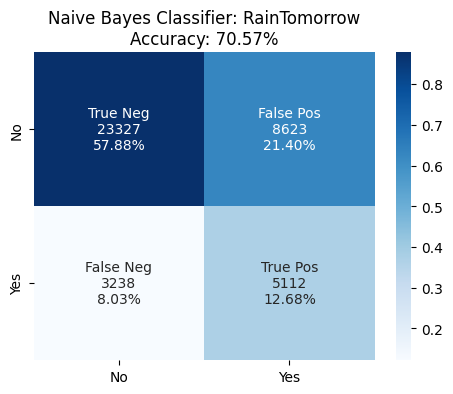

In [150]:
draw_cf_matrix(df2_test_y, y_pred, "Naive Bayes Classifier: RainTomorrow")

#### K-Najbliższych Sąsiadów ####

##### dla k = 3 #####

In [151]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df2_train_X, df2_train_y)
evaluation = knn.score(df2_test_X, df2_test_y)
y_pred = knn.predict(df2_test_X)
print("K-Neighbors, k=3 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=3 - skuteczność: 79.94 %


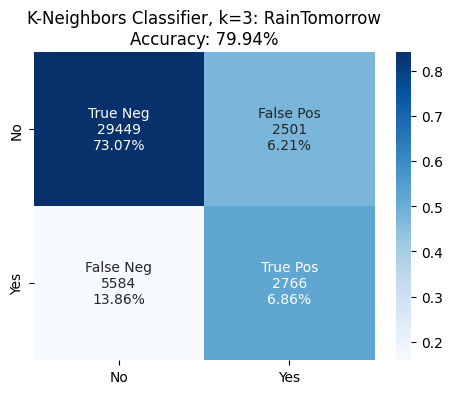

In [152]:
draw_cf_matrix(df2_test_y, y_pred, "K-Neighbors Classifier, k=3: RainTomorrow")

##### dla k = 5 #####

In [153]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df2_train_X, df2_train_y)
evaluation = knn.score(df2_test_X, df2_test_y)
y_pred = knn.predict(df2_test_X)
print("K-Neighbors, k=5 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=5 - skuteczność: 80.74 %


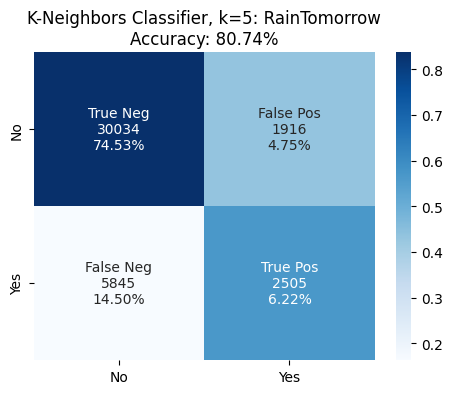

In [154]:
draw_cf_matrix(df2_test_y, y_pred, "K-Neighbors Classifier, k=5: RainTomorrow")

##### dla k = 11 (najlepsza znaleziona wartość) #####

In [155]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(df2_train_X, df2_train_y)
evaluation = knn.score(df2_test_X, df2_test_y)
y_pred = knn.predict(df2_test_X)
print("K-Neighbors, k=10 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=10 - skuteczność: 81.33 %


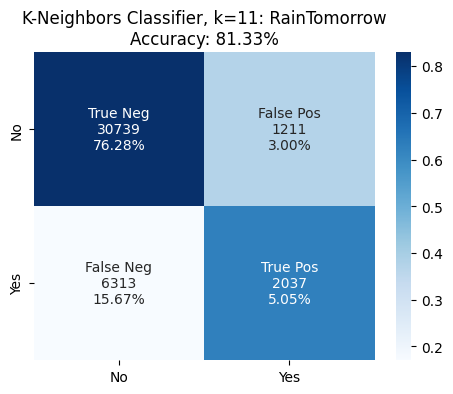

In [156]:
draw_cf_matrix(df2_test_y, y_pred, "K-Neighbors Classifier, k=11: RainTomorrow")

##### dla k = 11 #####

In [157]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(df1_train_X, df1_train_y)
evaluation = knn.score(df1_test_X, df1_test_y)
y_pred = knn.predict(df1_test_X)
print("K-Neighbors, k=11 - skuteczność:", round(evaluation*100, 2), "%")

K-Neighbors, k=11 - skuteczność: 82.54 %


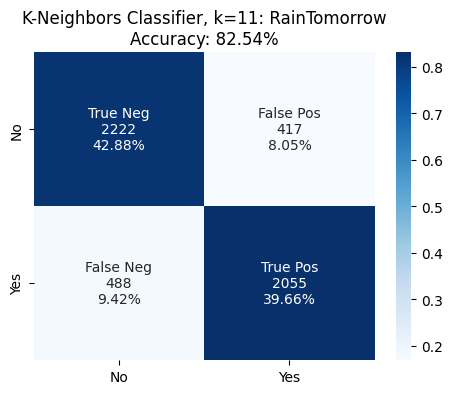

In [158]:
draw_cf_matrix(df1_test_y, y_pred, "K-Neighbors Classifier, k=11: RainTomorrow")

#### Sieć Multi-layer Perceptron ####

##### Wersja 1 - jedna warstwa hidden o rozmiarze równym inputowi #####

In [159]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(62,))
clf.fit(df2_train_X, df2_train_y)
y_pred = clf.predict(df2_test_X)
evaluation = clf.score(df2_test_X, df2_test_y)

print("MLPC 1 - skuteczność:", round(evaluation*100, 2), "%")

MLPC 1 - skuteczność: 85.32 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


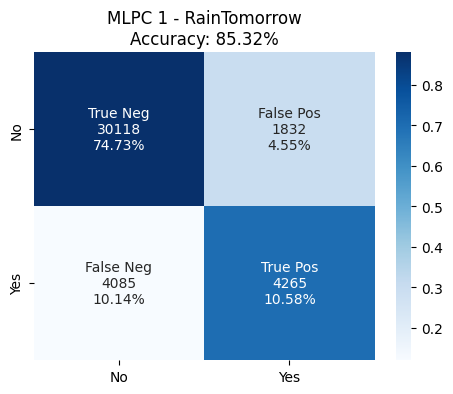

In [160]:
draw_cf_matrix(df2_test_y, y_pred, "MLPC 1 - RainTomorrow")

Text(0.5, 1.0, 'Loss curve')

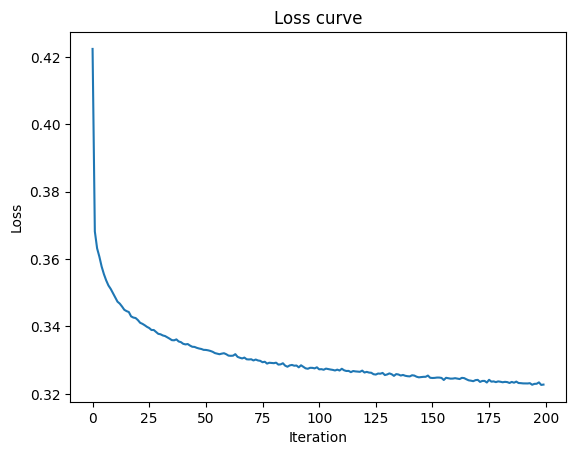

In [161]:
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")

##### Wersja 2 - dwie warstwy hidden o rozmiarach równych inputowi #####

In [162]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(62, 62))
clf.fit(df2_train_X, df2_train_y)
y_pred = clf.predict(df2_test_X)
evaluation = clf.score(df2_test_X, df2_test_y)

print("MLPC 2 - skuteczność:", round(evaluation*100, 2), "%")

MLPC 2 - skuteczność: 84.38 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


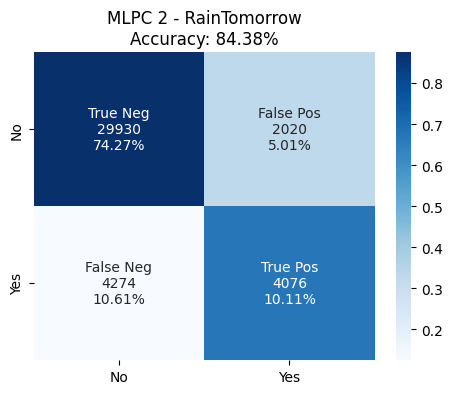

In [163]:
draw_cf_matrix(df2_test_y, y_pred, "MLPC 2 - RainTomorrow")

Text(0.5, 1.0, 'Loss curve')

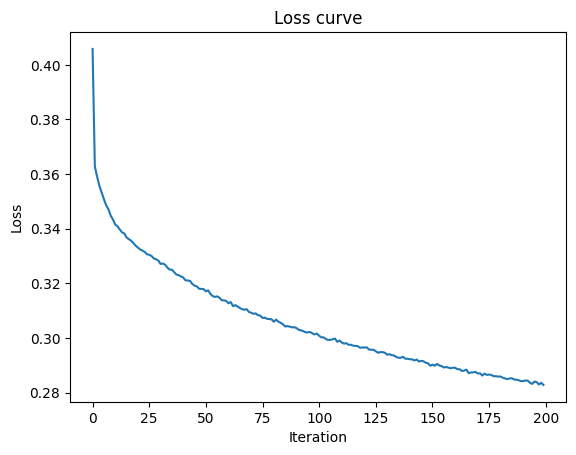

In [164]:
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")

##### Wersja 3 - dwie warstwy hidden o rozmiarach 2/3 inputu + output #####

In [165]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(43, 43))
clf.fit(df2_train_X, df2_train_y)
y_pred = clf.predict(df2_test_X)
evaluation = clf.score(df2_test_X, df2_test_y)

print("MLPC 3 - skuteczność:", round(evaluation*100, 2), "%")

MLPC 3 - skuteczność: 85.06 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


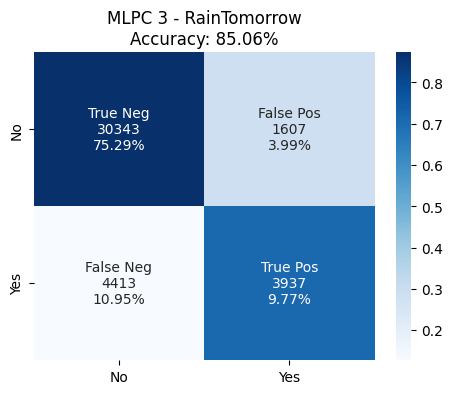

In [166]:
draw_cf_matrix(df2_test_y, y_pred, "MLPC 3 - RainTomorrow")

Text(0.5, 1.0, 'Loss')

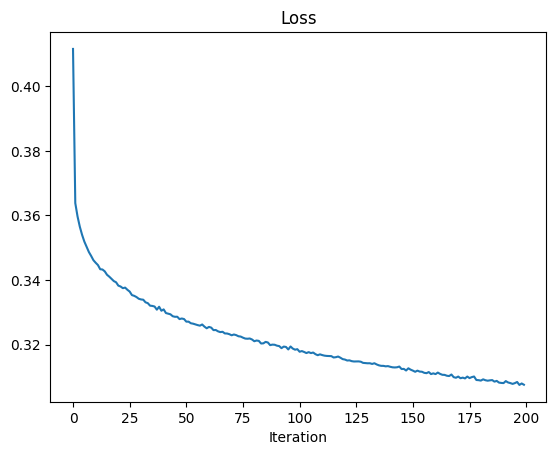

In [167]:
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.title("Loss")

## Podsumowanie ##

Wyniki dokładności klasyfikatorów dla dwóch wersji przygotowanej bazy danych pokazały niewielkie lecz zauważalne rożnice.
W przypadku drzewa decyzyjnego, widoczne są lepsze wartości dla silnie przetworzonej wersji (o ok. 1% - 3%, w granicach 80% +) z wyjątkiem drzewa o głębokości 1,
które było skuteczniejsze aż o ok. 7% (ok. 83%, mimo wykorzystania tej samej zmiennej - "Humidity3pm").
Naiwny Bayes z kolei dużo gorzej wypadał dla tego wariantu, z wynkiem aż o 7% niższym (ok. 70%, co czyni go najsłabszym klasyfikatorem w całym projekcie).
Operując na silnie przetowrzonych danych, słabsze wyniki uzyskał również klasyfikator Knn, choć różnice były bardzo niewielkie (na poziomie ok. 1% - 2% dla podobnych wartości k)
a ogólna dokładność mieściła się z przedziału porównywalnego z innymi klasyfikatorami (+/- 80%).
Minimalnie lepiej wypadły tutaj wszystkie wersje sieci MLPC (o ok. 1% - 1.5%), osiągając najlepszy wynik równy ok. 85% dla topologii z jedną warstwą hidden o rozmiarze równym inputowi.